In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
import copy
from scipy import optimize as opt
import altmin_pca

In [2]:
mot_bursts=np.load('mot_bursts.npy')
vis_bursts=np.load('vis_bursts.npy')
all_bursts=np.vstack([mot_bursts, vis_bursts])
ncomps=20
burst_std=RobustScaler().fit_transform(all_bursts)
pca = PCA(n_components=ncomps)
pcs = pca.fit_transform(burst_std)

0.6716473056529895


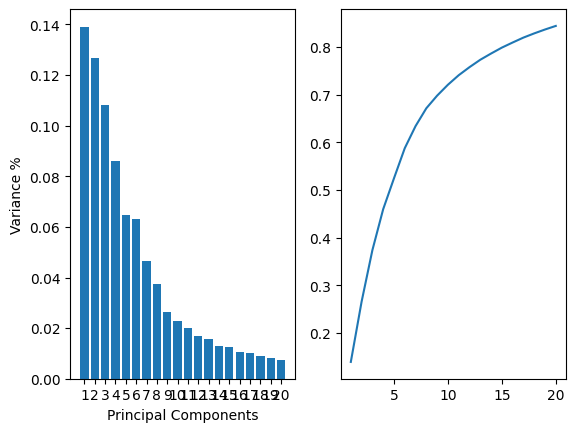

In [3]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.figure(facecolor='w')
plt.subplot(1,2,1)
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

plt.subplot(1,2,2)
plt.plot(range(1,len(PC)+1),pca.explained_variance_ratio_.cumsum())

pcs_to_analyze=20
print(pca.explained_variance_ratio_.cumsum()[7])

In [4]:
[W,C]=altmin_pca.pca(burst_std, ncomps)

PC1: iterations=14, error=251.54088632226058
PC2: iterations=24, error=232.32816761182286
PC3: iterations=13, error=214.56712022582568
PC4: iterations=25, error=199.30770137735576
PC5: iterations=25, error=187.01487335598696
PC6: iterations=22, error=174.13680429721893
PC7: iterations=17, error=164.0155723319845
PC8: iterations=17, error=155.39131492906867
PC9: iterations=23, error=149.0091183761958
PC10: iterations=15, error=143.26115589403153
PC11: iterations=19, error=138.03825695042985
PC12: iterations=40, error=133.4680620718762
PC13: iterations=24, error=129.11018296883702
PC14: iterations=13, error=125.33584507324362
PC15: iterations=21, error=121.64113610143505
PC16: iterations=24, error=118.36061869108737
PC17: iterations=38, error=115.114640260979
PC18: iterations=46, error=112.25981782794588
PC19: iterations=20, error=109.55063532676017
PC20: iterations=13, error=107.34822243865737


Text(0, 0.5, 'optimized PCA')

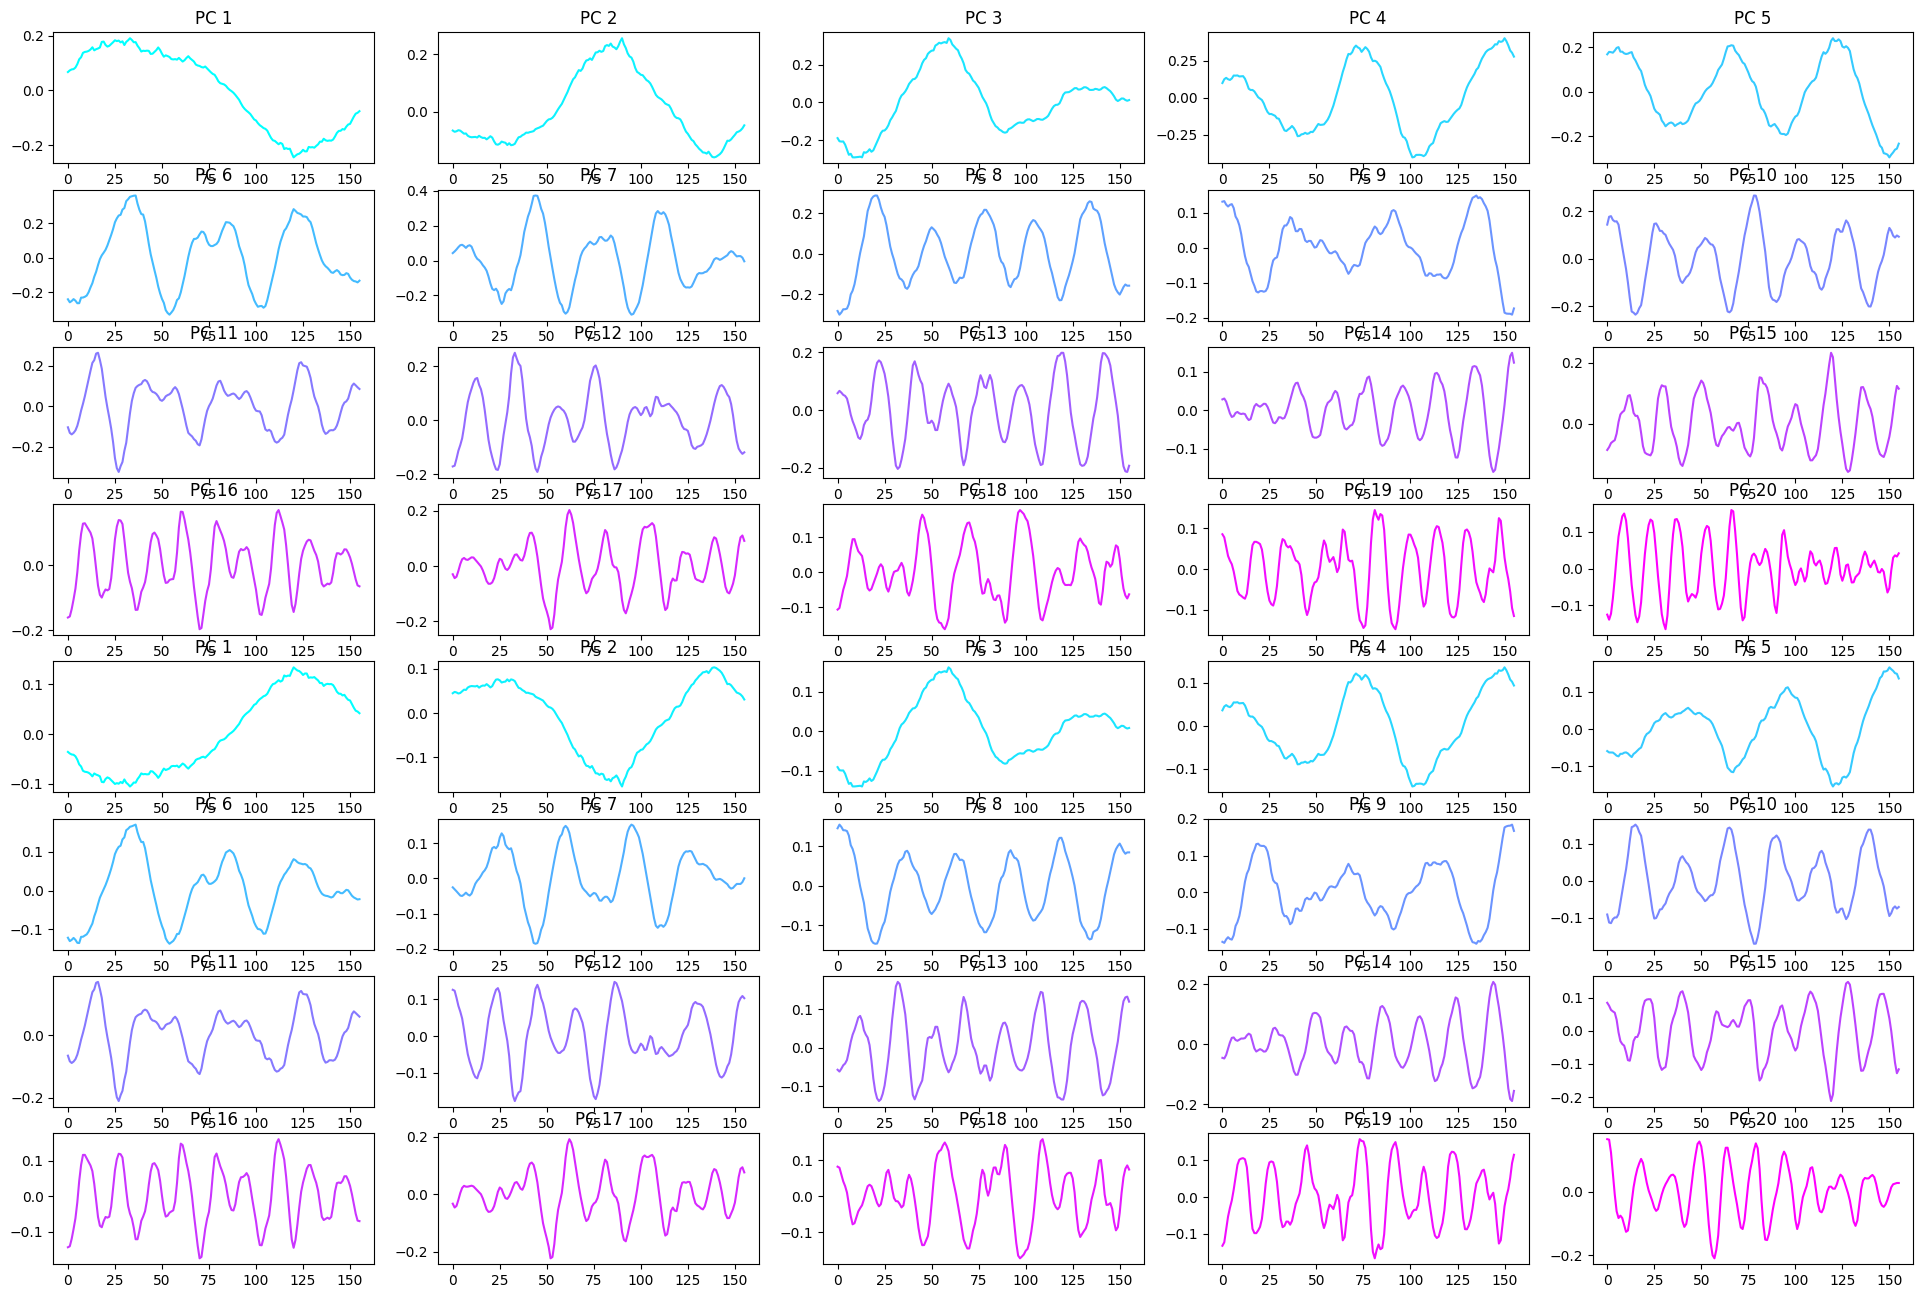

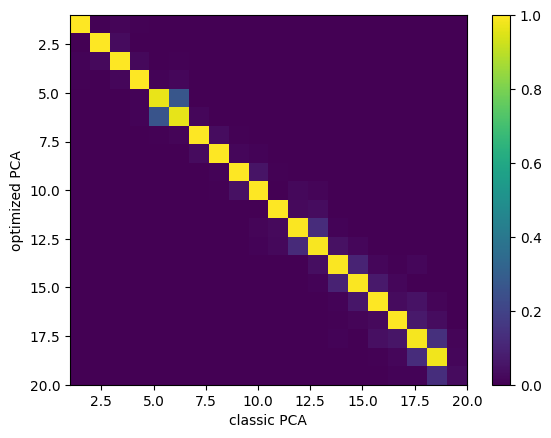

In [5]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')


In [6]:
[W,C]=altmin_pca.quadratically_regularized_pca(burst_std, ncomps, alpha=50)

PC1: iterations=27, error=256.4655525060809
PC2: iterations=24, error=242.8499221465447
PC3: iterations=13, error=231.38470671516265
PC4: iterations=23, error=222.98724259617765
PC5: iterations=62, error=217.88982864787826
PC6: iterations=17, error=212.8936171546611
PC7: iterations=24, error=210.71490507706562
PC8: iterations=11, error=210.6462692190671
PC9: iterations=6, error=210.5905214990032
PC10: iterations=50, error=210.00570950433735
PC11: iterations=10, error=209.95683637212588
PC12: iterations=23, error=209.9081788529276
PC13: iterations=17, error=209.86491431968827
PC14: iterations=27, error=209.82386230203082
PC15: iterations=28, error=209.7773587954462
PC16: iterations=23, error=209.73679842943855
PC17: iterations=25, error=209.70873691292056
PC18: iterations=13, error=209.67863439479905
PC19: iterations=21, error=209.64923238203332
PC20: iterations=35, error=209.60214690951517


Text(0, 0.5, 'optimized PCA')

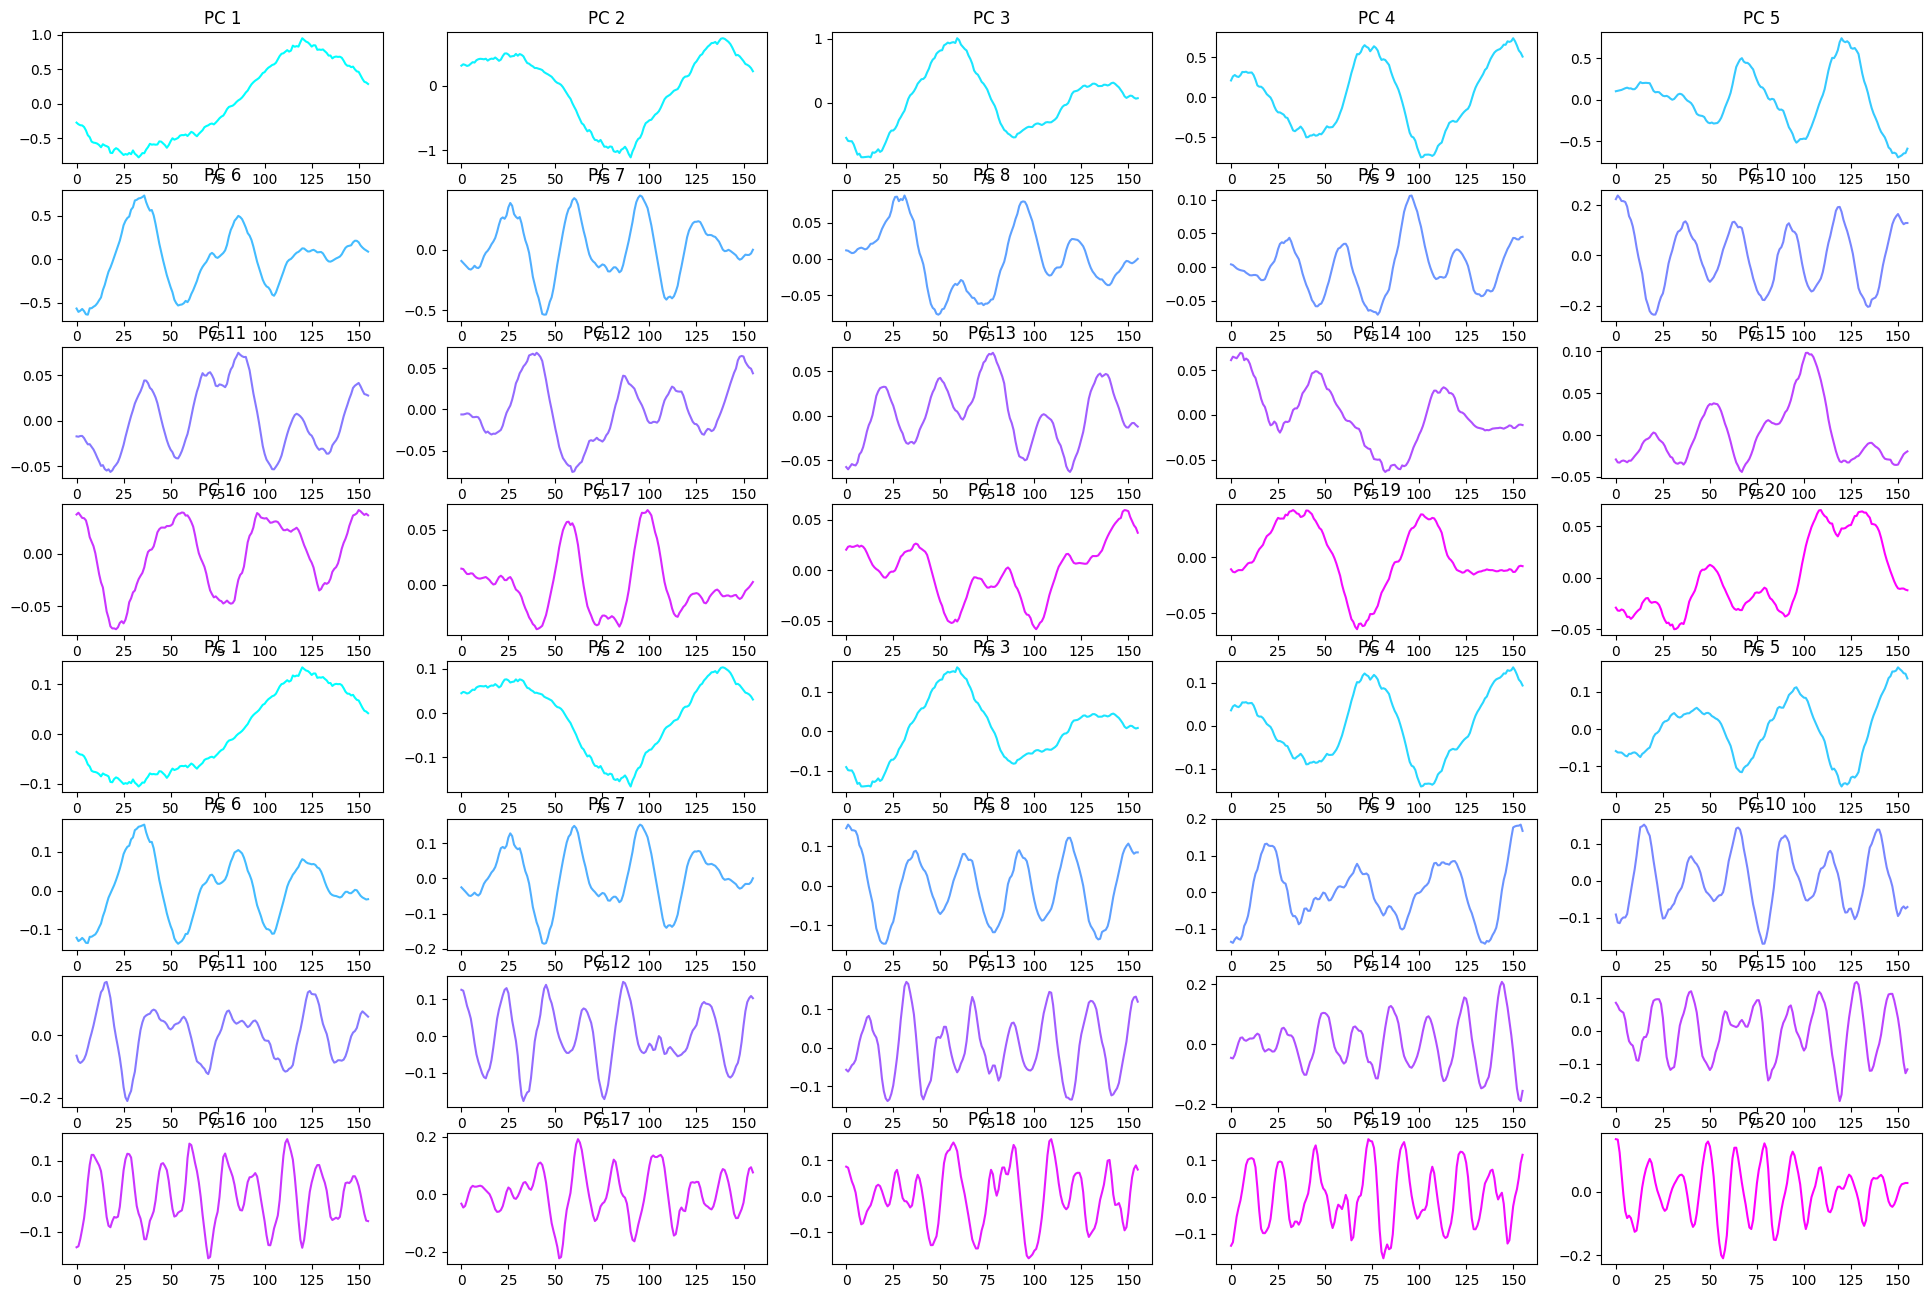

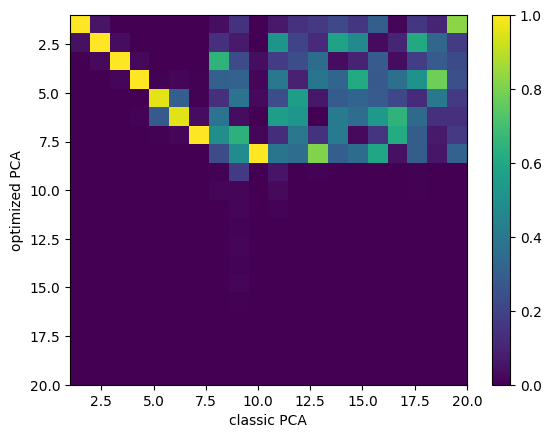

In [7]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [8]:
[W,C]=altmin_pca.sparse_pca(burst_std, ncomps, alpha=20)

PC1: iterations=26, error=254.03862981256705
PC2: iterations=56, error=235.79144962192854
PC3: iterations=42, error=220.1862799550789
PC4: iterations=20, error=220.04673618289715
PC5: iterations=30, error=207.21993735541574
PC6: iterations=16, error=207.13657270768223
PC7: iterations=13, error=207.09649299429782
PC8: iterations=15, error=207.00938179596884
PC9: iterations=19, error=206.58178517953544
PC10: iterations=17, error=206.45227849241203
PC11: iterations=4, error=206.32157140520815
PC12: iterations=19, error=206.16429606784646
PC13: iterations=18, error=205.96876286966435
PC14: iterations=18, error=205.78366003898634
PC15: iterations=15, error=204.50243039466733
PC16: iterations=15, error=204.45137798029182
PC17: iterations=11, error=204.43518261325698
PC18: iterations=12, error=204.4121746424636
PC19: iterations=14, error=204.36246587031636
PC20: iterations=12, error=204.3473453491097


Text(0, 0.5, 'optimized PCA')

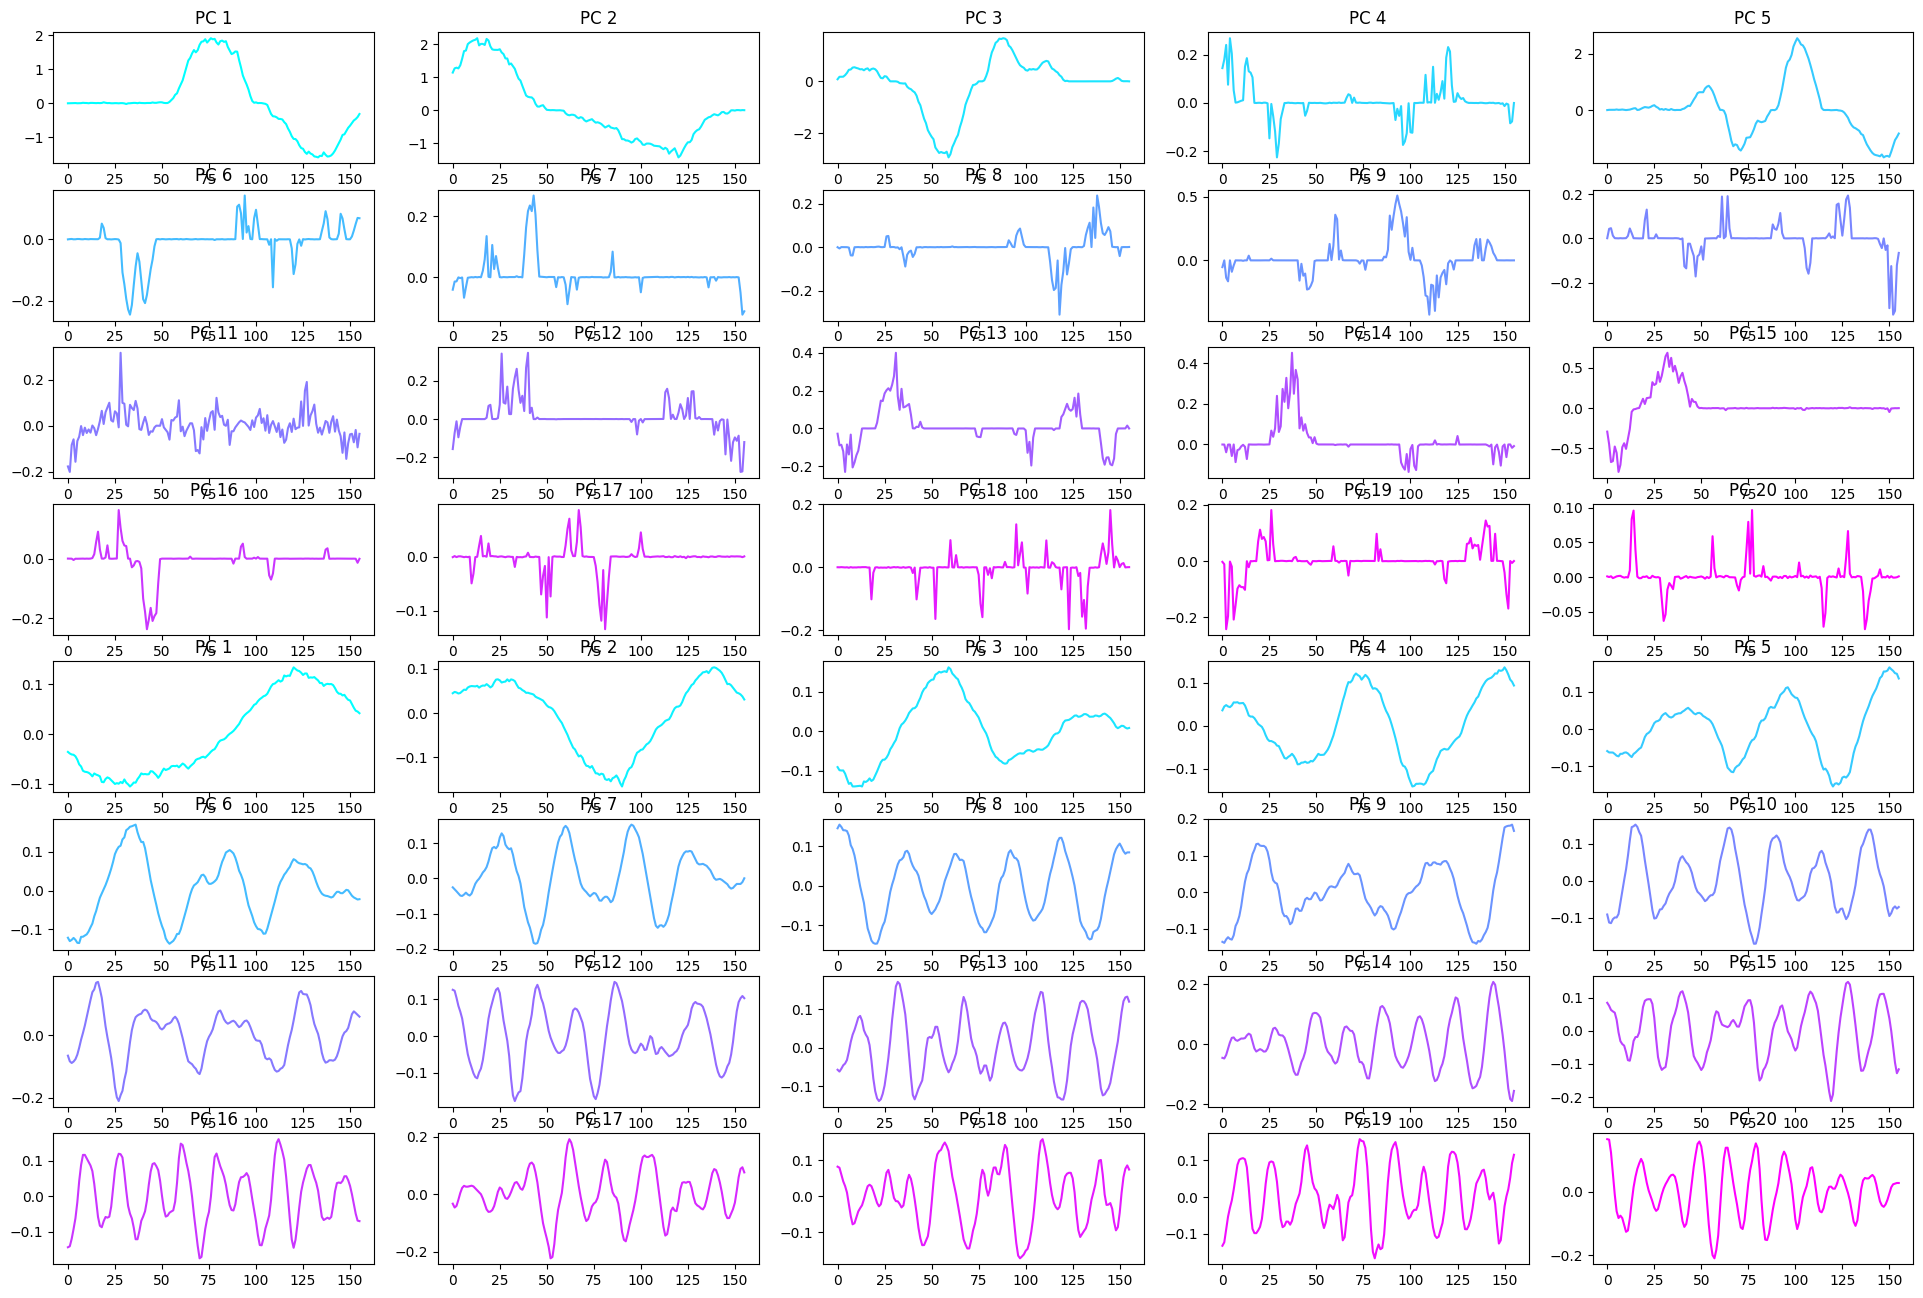

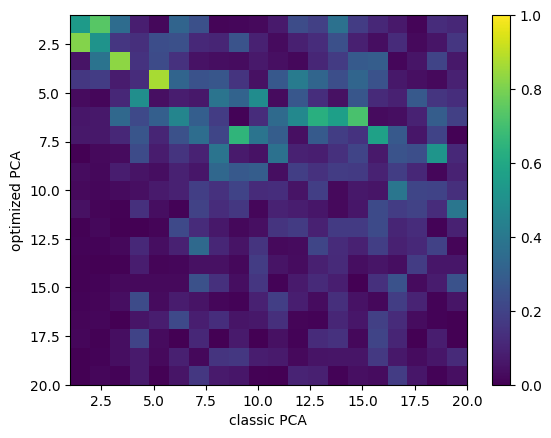

In [9]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')